<a href="https://colab.research.google.com/github/Divyansh-Bari/CODSOFT/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [ ]:
# Loading the dataset from csv file to a Pandas DataFrame
data= pd.read_csv('/content/advertising.csv')

In [ ]:
# first 5 rows of the DataFrame
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# last 5 rows of the DataFrame
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
data.shape

(200, 4)

In [ ]:
# Getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Declaing dependent and independent variables
x=data.drop(columns='Sales', axis=1)
y=data['Sales']

In [ ]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [ ]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


Splitting the data into training and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

Fitting the Model

In [ ]:
model= XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(200, 3) (160, 3) (40, 3)


Model Evaluation

In [ ]:
# Accuracy on Training data
x_train_prediction = model.predict(x_train)

In [ ]:
print(x_train_prediction)

[20.800026  18.000793  21.801434  15.200705  19.797712  19.19996
 17.10098    1.6014427 10.899103   7.200409  12.899338  16.69957
 17.401733  17.30034    9.698243  16.698692  11.000303   4.8004622
  7.6014404 26.998966  18.899916  19.601587  11.501806  20.699823
 20.000011  11.297989  17.599524   7.199455   5.2988014 10.402879
 15.499517   8.000903  18.200409  10.9998665 10.400364   6.601537
  5.9006443 10.096973  16.400553  20.89899   25.40028   25.401043
 17.500917  17.596148  20.699877  22.099104  20.89685   10.100358
 25.400475  15.898734  17.99984    7.3001633 15.300449  20.099667
 14.20482   21.398306  20.60032   24.398342  18.398777  17.201399
 14.5997925 11.900011  20.699224  11.901923  22.200512  11.599601
 17.50037   23.699484  12.501503  16.597992   7.3001394 17.198187
 15.497528  14.803055  17.000141  10.800901  13.299188  12.298908
 13.997821  16.000217  13.998789  21.700676  11.299831  20.49632
 23.800087  10.600715  11.900123  11.600103  24.199364  17.29998
 18.901943   

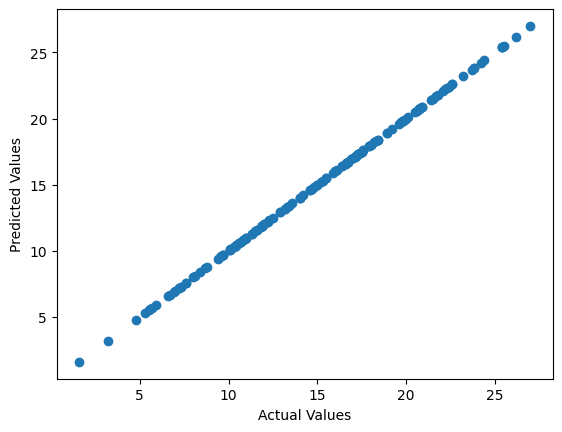

In [ ]:
# plotting the actual and predicted values
plt.scatter(y_train, x_train_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# Calculating the R-Squared values on training data
r2_training= r2_score(y_train, x_train_prediction)

In [ ]:
print(r2_training)

0.9999998952002466


In [ ]:
# # Accuracy on Test data
x_test_prediction = model.predict(x_test)

In [ ]:
# Calculating the R-Squared values on test data
r2_test= r2_score(y_test, x_test_prediction)

In [ ]:
print(r2_test)

0.9061650759148159


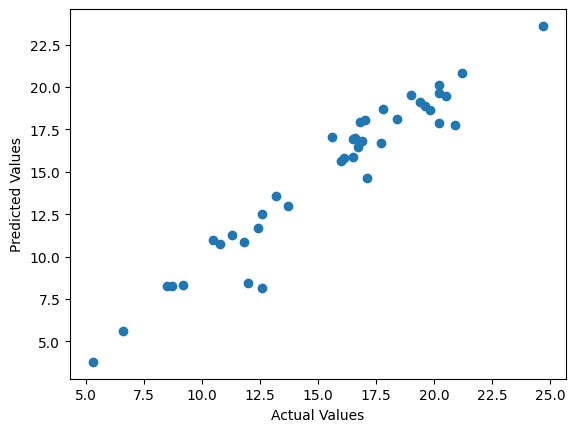

In [ ]:
# plotting the actual and predicted values on test data
plt.scatter(y_test, x_test_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()